# Covid Survival in Mexico Analysis

## 1. Business Understanding

**1.1 - Background** : After three years of pandemic, all the world knows about COVID19, a virus that causes severe acute respiratory syndrome (SARS-CoV-2). Over 106 million SARS-CoV-2 infections and over 2.3 million fatalities have been reported as of the first week of February 2021. This epidemic has severely disrupted global economic activity. 
In response to the worldwide public health crisis, scientists and physicians have worked very hard to give new insights and develop technology solutions that may assist in combating this infectious sickness and lessening its effects. <br>
<br>
Artificial intelligence approaches have been recognized in this context as a potent and promising technology that may help with:
<ul>
    <li>the diagnostic process</li>
    <li>prediction of disease spreading dynamics</li>
    <li>tracking of infected patients</li>
    <li> tracking of potential future patients</li>
    <li> determine if a particular patient poses a mortality risk</li>
</ul>

**1.2 - Business Objectives**: In this scenario is important to improve hospital capacity planning and ensure that patient receive timely treatment.

**1.3 - Business Success Criteria**: The business success criterias are met if health care priorities are currenty assigned and identify high-risk patients are quickly identified.

**1.4 - Situation**: To our disposal we have a dataset containing 4 million entries of 40 attributes, each one containing information about a patient 

#todooooooooo

**1.5 - Data Mining Goals**: Correctly identify patients who are more likely to die and patients who are more likely to survive.

**1.6 - Data Mining Success Criteria**: The success criteria are satisfied if the model is able to identify patient with high precision in a fast way.

## 2. Data Understanding

**2.1 - Initial Data Collection**

In [2]:
# libraries import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set_palette("Set2")

In [144]:
df = pd.read_csv("./dataset/COVID19MEXICO2020.csv")

/var/folders/rr/stc45rdd10q7w37xr3dvpzt40000gn/T/ipykernel_2240/3753177704.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./dataset/COVID19MEXICO2020.csv")


In [245]:
print(f"Data has {df.shape[0]} rows and {df.shape[1]} attributes")

Data has 3868396 rows and 40 attributes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3868396 entries, 0 to 3868395
Data columns (total 40 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   FECHA_ACTUALIZACION    object
 1   ID_REGISTRO            object
 2   ORIGEN                 int64 
 3   SECTOR                 int64 
 4   ENTIDAD_UM             int64 
 5   SEXO                   int64 
 6   ENTIDAD_NAC            int64 
 7   ENTIDAD_RES            int64 
 8   MUNICIPIO_RES          int64 
 9   TIPO_PACIENTE          int64 
 10  FECHA_INGRESO          object
 11  FECHA_SINTOMAS         object
 12  FECHA_DEF              object
 13  INTUBADO               int64 
 14  NEUMONIA               int64 
 15  EDAD                   int64 
 16  NACIONALIDAD           int64 
 17  EMBARAZO               int64 
 18  HABLA_LENGUA_INDIG     int64 
 19  INDIGENA               int64 
 20  DIABETES               int64 
 21  EPOC                   int64 
 22  ASMA                   int64 
 23  INMUSUP

**2.2 - Data Description:** The dataset is composed of 39 features and 1 target variable (TIPO_PACIENTE).

The target variable is a categorical dependent variable that can be _1_ if the patient is more likely to survive or _2_ if the patient is more likely to die. 

We can see that the dataset is unbalanced (there are more paients who are more likely to survive than to die). This may cause our model to be biased and always predict the majority class with still retaining an higher level of accuracy. There are multiple solutions to this problem: one can be oversampling the minority class to balance the result but it may introduce dublicates and bias. Another solution can be to assign weigth to the classes and force the model to pay attention also to the minority. 

In [8]:
df[["TIPO_PACIENTE"]].value_counts()

TIPO_PACIENTE
1                3340218
2                 528178
dtype: int64

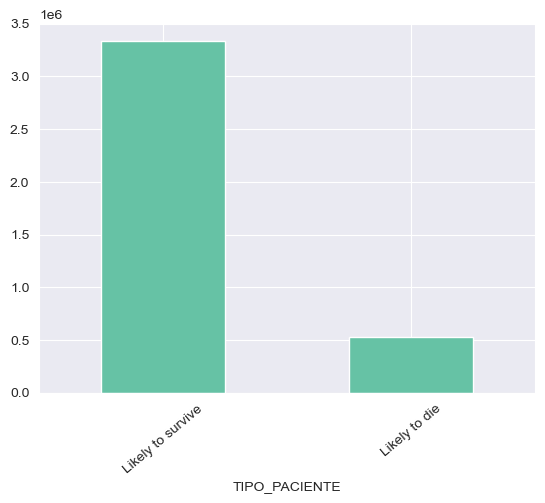

In [9]:
ax = df[["TIPO_PACIENTE"]].value_counts().plot(kind="bar")
ax.set_xticklabels(['Likely to survive', 'Likely to die'], rotation=40)
plt.show()

Features can be divided into 3 categories:

In [176]:
# categorical values have numerical identifier 
name_dict = {'SI': 1, 'NO': 2, 'DO NOT KNOW': 97, 'ANSWER REFUSED': 98, 'NOT APPLICABLE': 99}

1. Medical History:

In [156]:
medical_history = ['DIABETES',  #Diabetes = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
    'OBESIDAD', #Obesity = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
    'ASMA', #Asthma = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
    'HIPERTENSION', #Hypertension = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
    'RENAL_CRONICA', #Chronic renal failure = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
    'CARDIOVASCULAR', #Cardiovascular diseases = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
    'EMBARAZO', #Pregnancy = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
    'TABAQUISMO', #Smoking = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
    'EPOC', #COPD = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
    'INMUSUPR', #Immunosuppressive drugs = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
    'OTRA_COM' #Other chronic illnesses = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
]

In [125]:
len(medical_history)

11

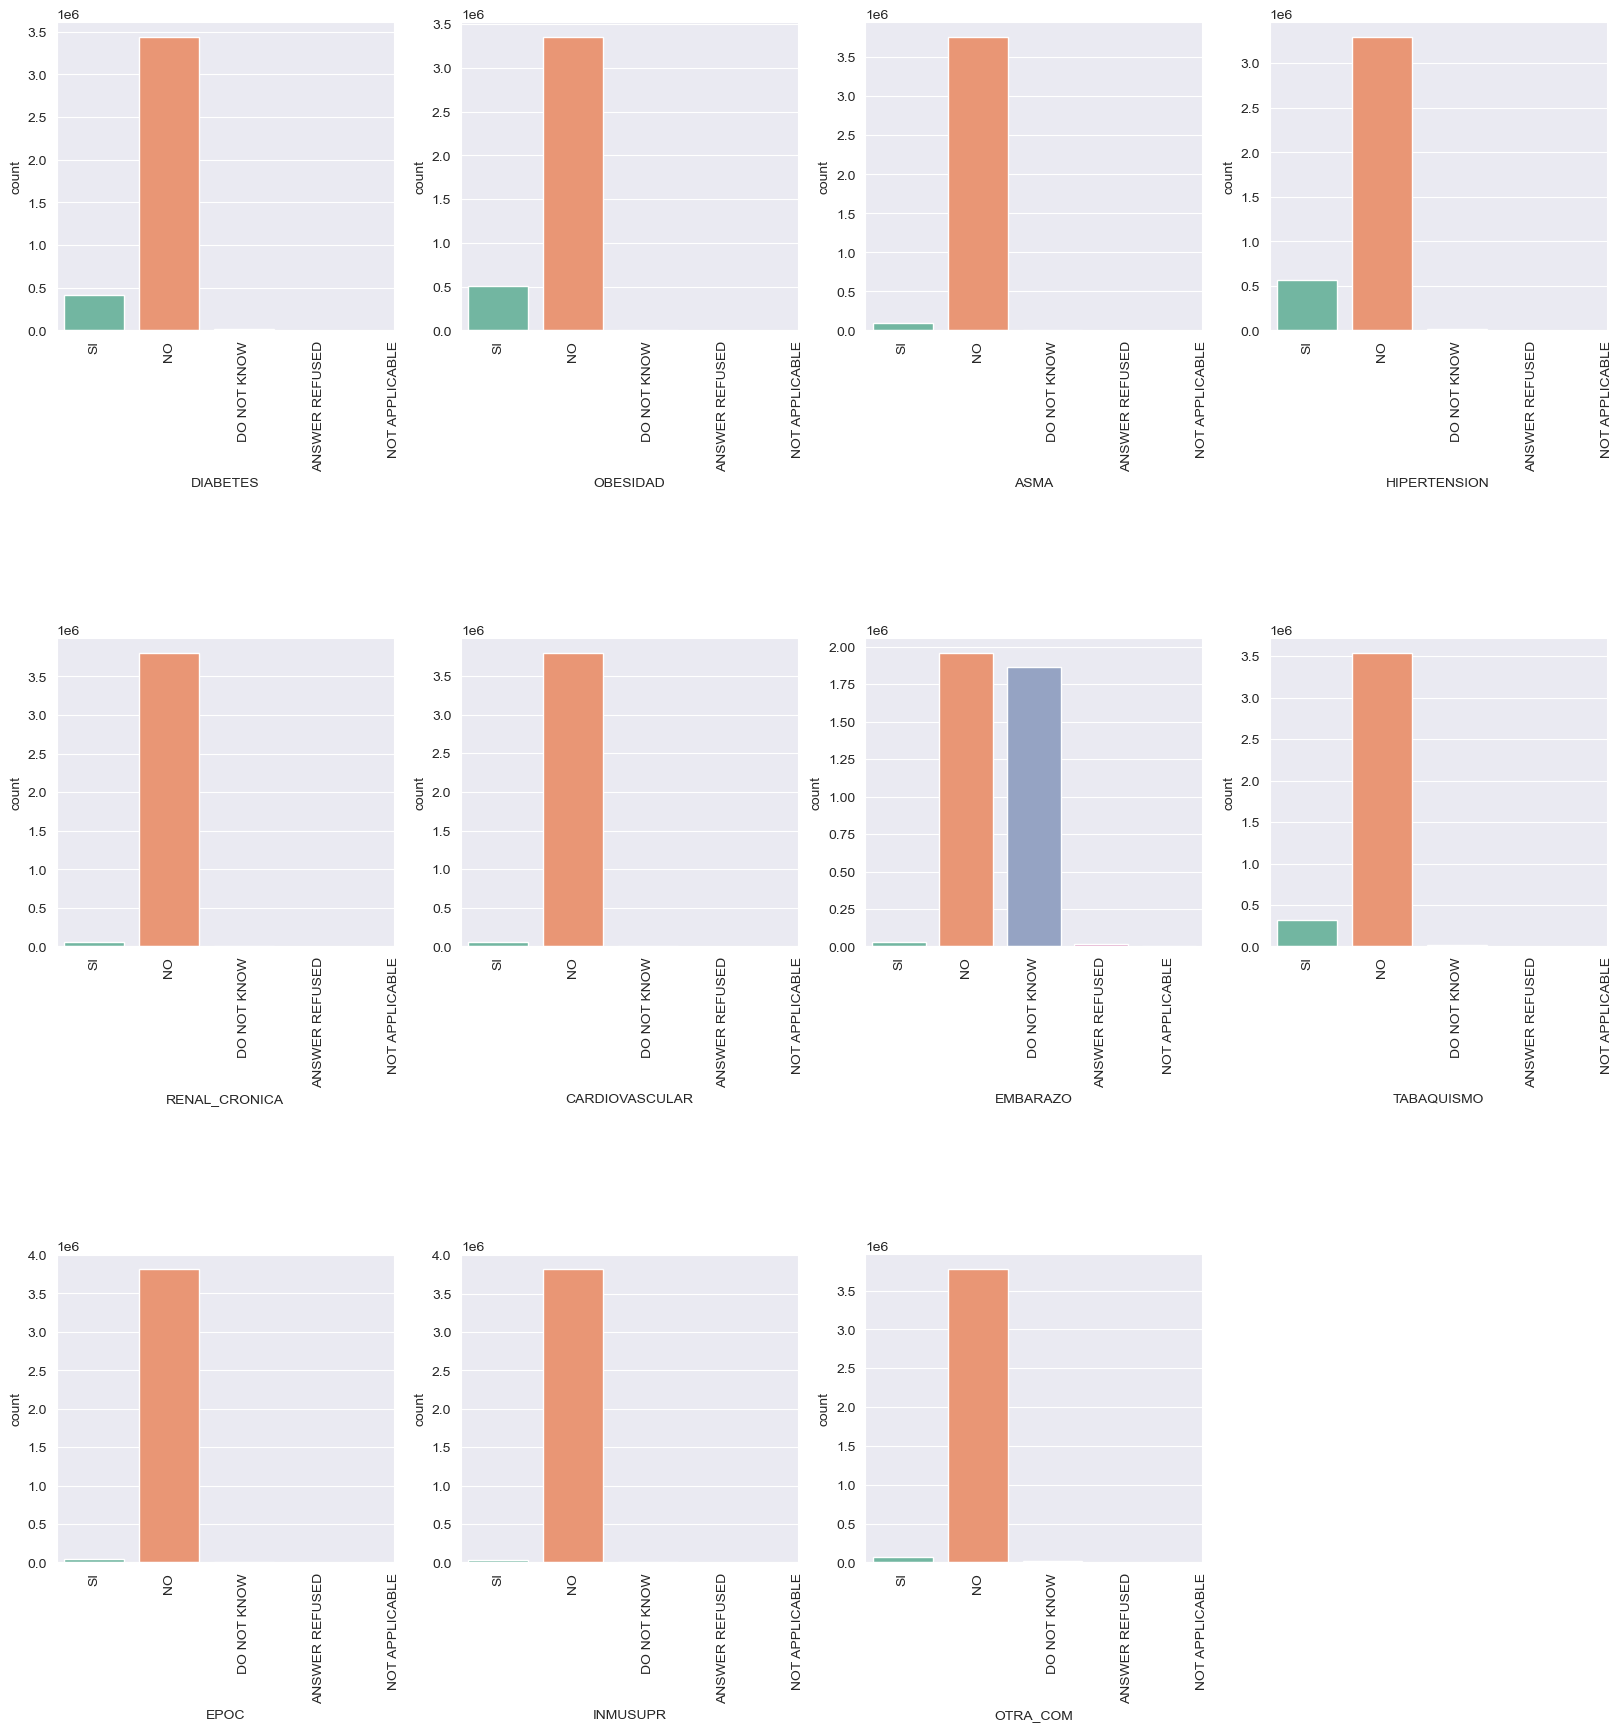

In [184]:
fig, ax = plt.subplots(3, 4, figsize=(20, 20))
fig.subplots_adjust(hspace=1)
for variable, subplot in zip(medical_history, ax.flatten()):
    chart = sns.countplot(x=df[variable], ax=subplot)
    chart.set_xticks(range(len(name_dict)), list(name_dict.keys()))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
fig.delaxes(ax[2,3])

We can detect an high number of NaNs in 'EMBARAZO' (probably, this feature won't be of much help in our research due to this).<br>
We can observe that the majority of the patients weren't in poor health (2=NO). <br>
All this variables are categorical (1=Yes, 2=No, 97=Don't Know, 98=Answer Refused, 99=Not Applicable).

2. Demographic Data:

In [201]:
demographic_data = ['SEXO', #gender (M/F)=(1/2)
                    'NACIONALIDAD', #nationality (1=mexican , 2=foreigner)
                    'INDIGENA', #indigeneous = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
                    'HABLA_LENGUA_INDIG', #Indigeneous language = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
                    'MIGRANTE', #migrant = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
                    'PAIS_ORIGEN', #state of birth = categorical (text)
                    'PAIS_NACIONALIDAD', #state of residence  = categorical (text)
                    'EDAD', #age = numerical
                    'ENTIDAD_NAC', #entity where patient was born = categorical (text)
                    'ENTIDAD_RES', #entity where patient is resident = categorical (text)
                    'MUNICIPIO_RES', #municial where patient is resident = categorical (text)
                   ]

In [122]:
len(demographic_data)

11

[Text(0, 0, 'MEXICAN'), Text(1, 0, 'FOREIGNER')]

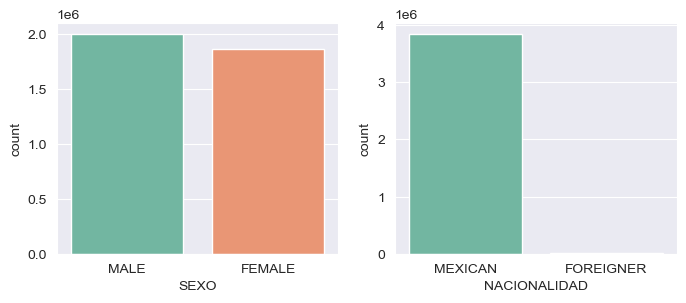

In [202]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(8, 3))
sns.countplot(x=df[demographic_data[0]], ax=ax1).set_xticklabels(['MALE', 'FEMALE'])
sns.countplot(x=df[demographic_data[1]], ax=ax2).set_xticklabels(['MEXICAN', 'FOREIGNER'])

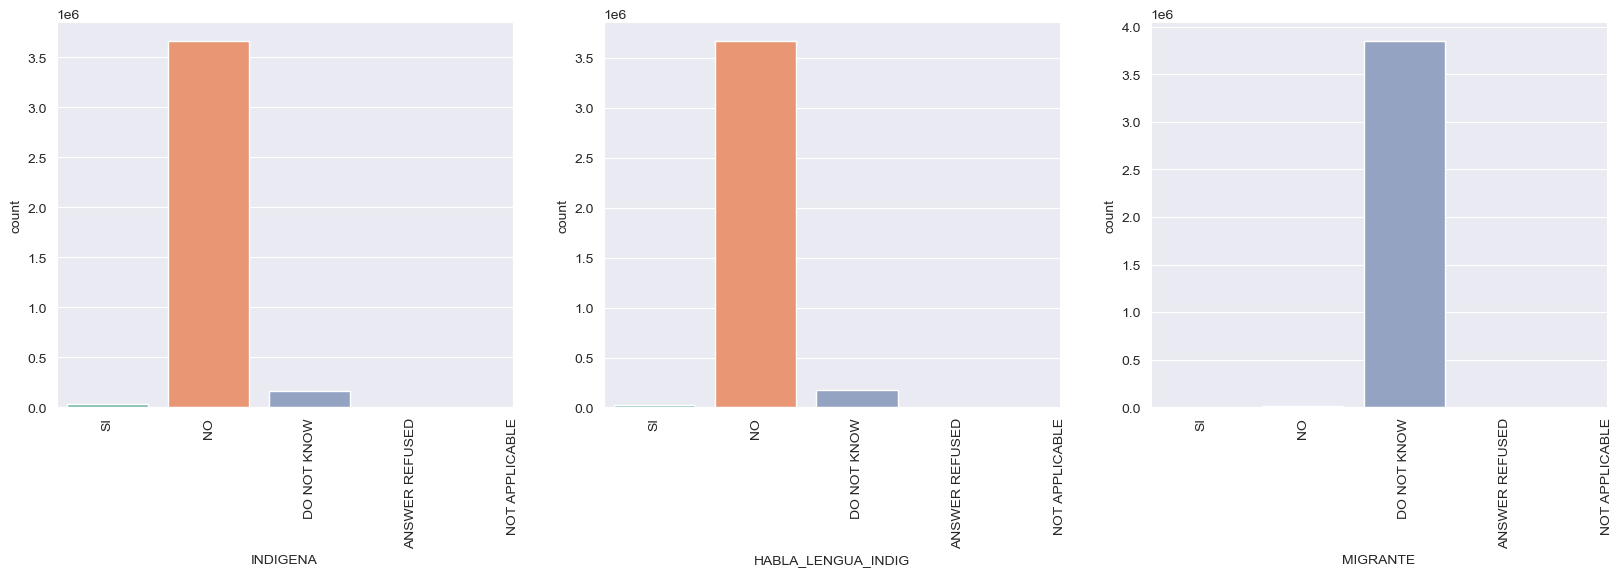

In [203]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for variable, subplot in zip(demographic_data[2:5], ax.flatten()):
    chart = sns.countplot(x=df[variable], ax=subplot)
    chart.set_xticks(range(len(name_dict)), list(name_dict.keys()))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

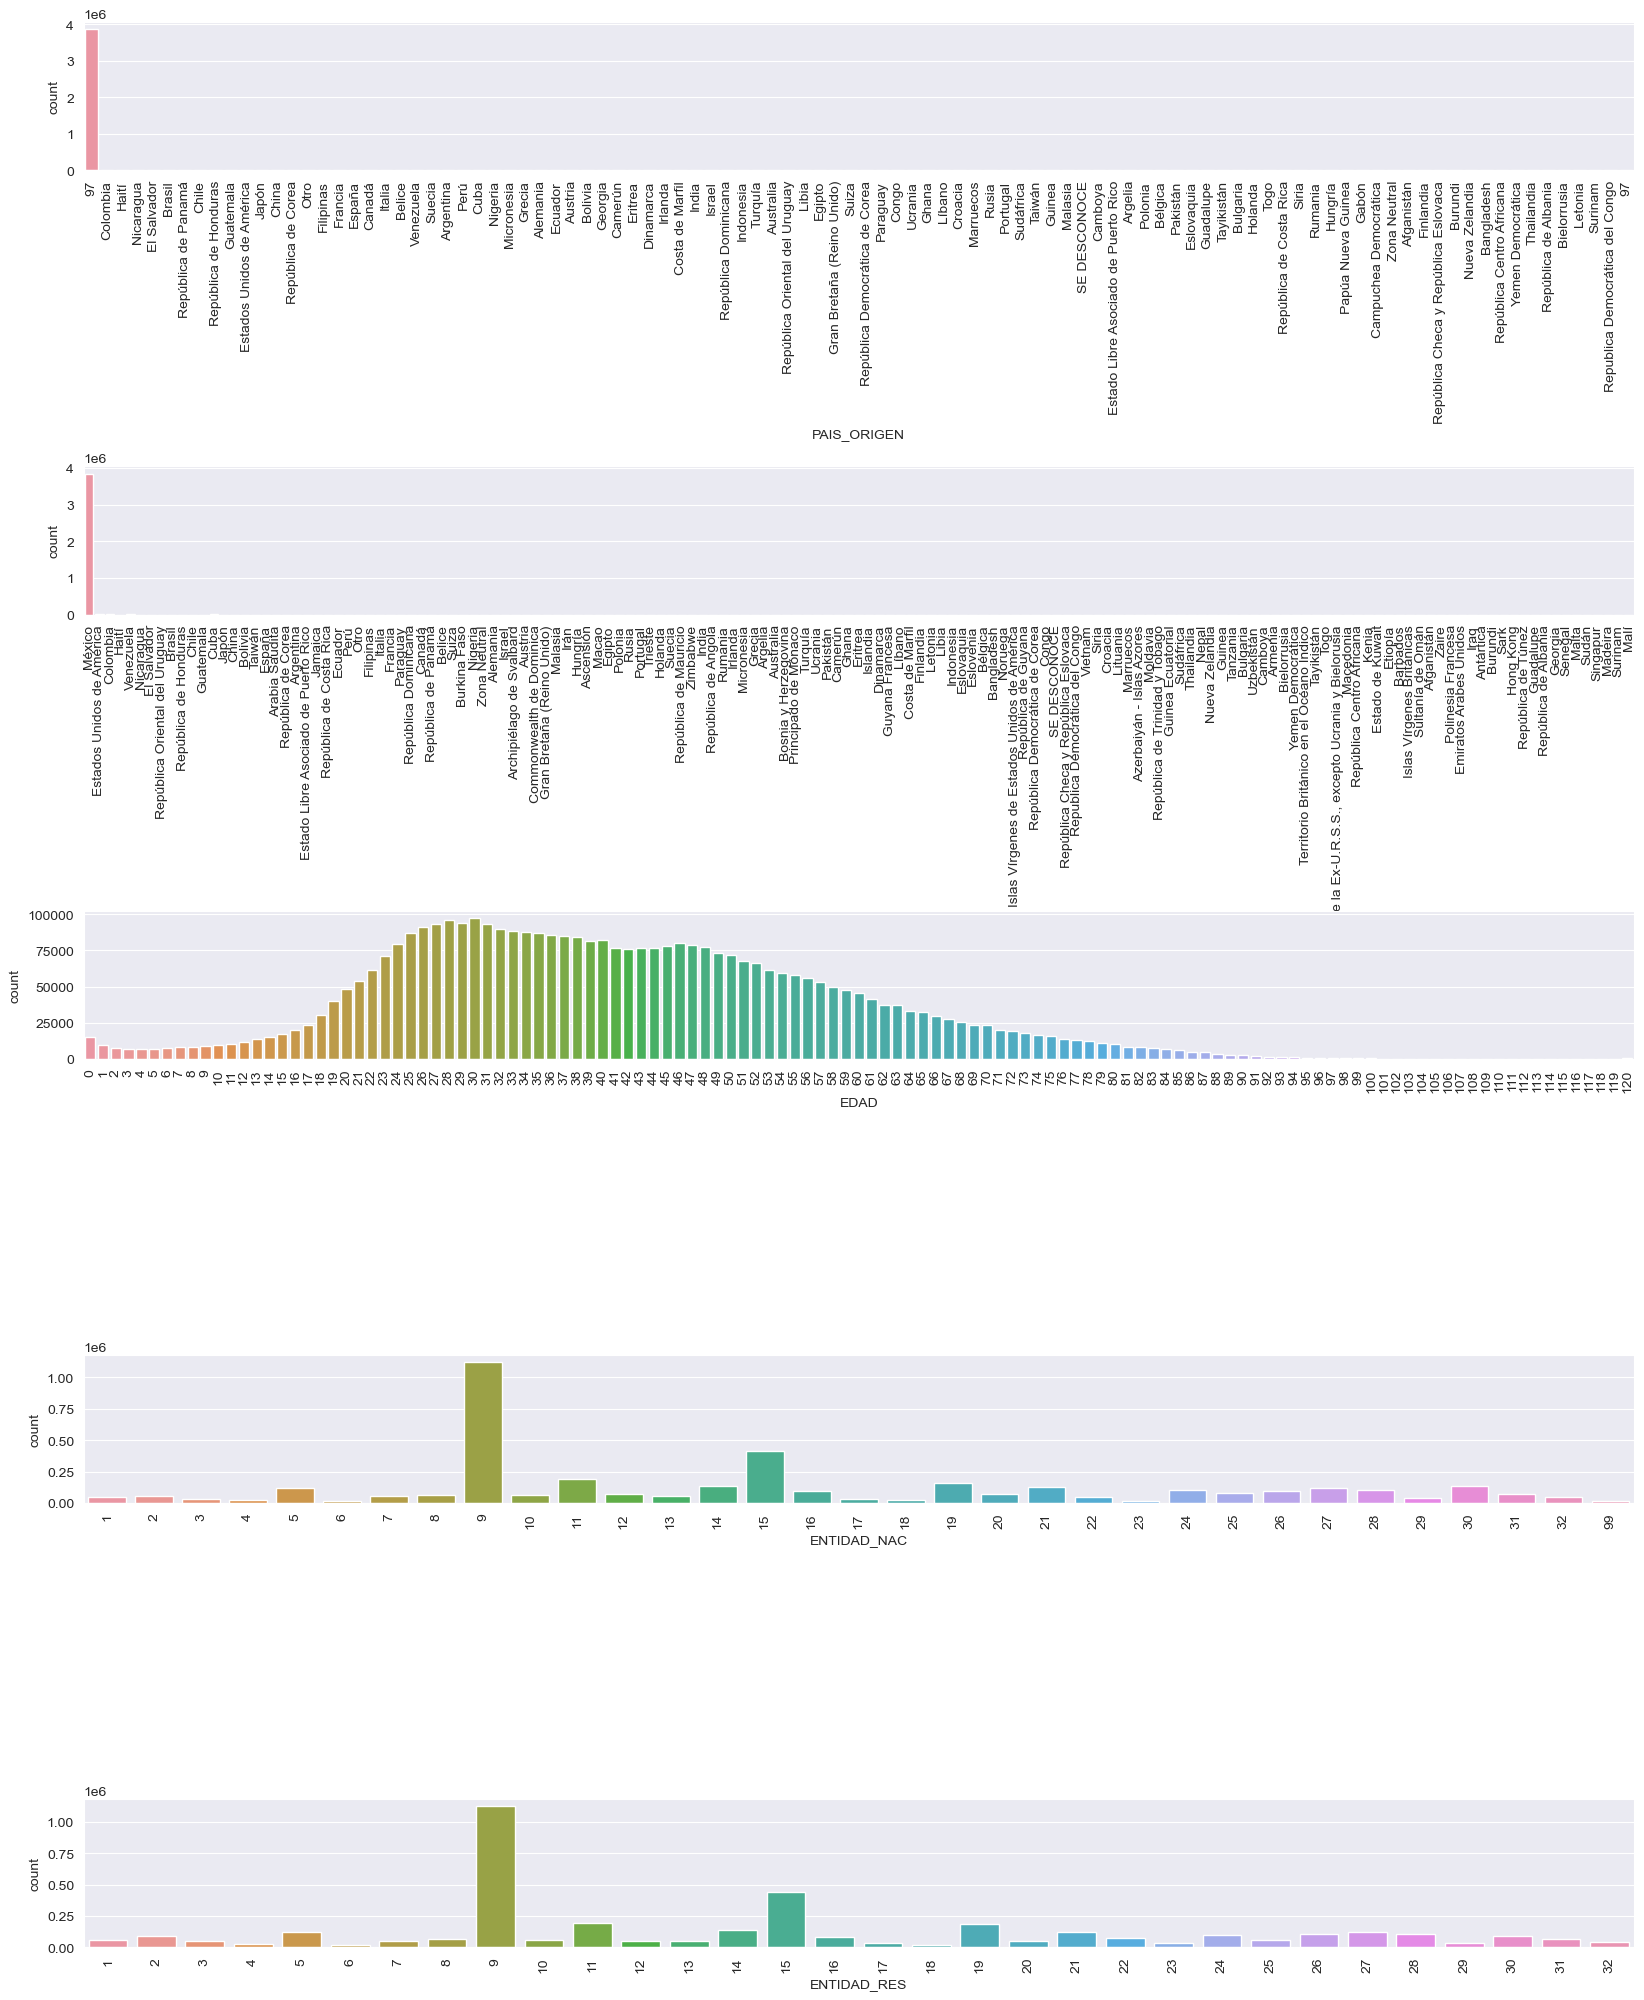

In [207]:
fig, ax = plt.subplots(5, 1, figsize=(20, 25))
fig.subplots_adjust(hspace=2)
for variable, subplot in zip(demographic_data[5:-1], ax.flatten()):
    chart = sns.countplot(x=df[variable], ax=subplot)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [208]:
df[['MUNICIPIO_RES']].value_counts()

MUNICIPIO_RES
7                224596
5                204191
4                145925
2                143183
10               134289
                  ...  
535                   1
236                   1
538                   1
341                   1
518                   1
Length: 522, dtype: int64

Again:
- in 'MIGRANTE' (migran) we can see many NaN's
- from the other features we can derive that most of the people is mexican
- we can notice some outliers in the feature 'EDAD' (age): it's not likely that someone had 120 years
- male and female are balanced

3. Recent Medical Info

In [221]:
medical_info = ['ID_REGISTRO', #id register = categorical (text)
                
                'ORIGEN', #system of respiratory disease monitoring health units (USMER) = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
                'INTUBADO', #if the patient required intubation = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
                'NEUMONIA', #PNEUMONIA = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
                'OTRO_CASO', #if it has had contact with other covid cases = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
                'TOMA_MUESTRA_LAB', #sample lab taken = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
                'RESULTADO_LAB', #test covid19 result = categorical (COVID/HEALTHY/DONT KNOW/ANSWER REFUSED/NA)
                'TOMA_MUESTRA_ANTIGENO', #test antigeno taken = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
                'RESULTADO_ANTIGENO', #test covid19 antigeno result = categorical (COVID/HEALTHY/DONT KNOW/ANSWER REFUSED/NA)
                'UCI'#if the patients was in the intense unit = categorical (SI/NO/DONT KNOW/ANSWER REFUSED/NA)
                
                'CLASIFICACION_FINAL', #Identifies if the patient is a case of COVID-19 = categorical (1-7)
                'ENTIDAD_UM', #entity where the medical unit that provided = categorical
                'TIPO_PACIENTE', #type of attention that the patient has received on arrival = categorical (Ambulatorio/hospitalizado)
                
                'FECHA_INGRESO', #date of arrival into medical unit (YYYY-MM-DD)
                'FECHA_SINTOMAS', #date of start symbols (YYYY-MM-DD)
                'FECHA_DEF', #date of death (YYYY-MM-DD)
]

In [256]:
len(medical_info)

15

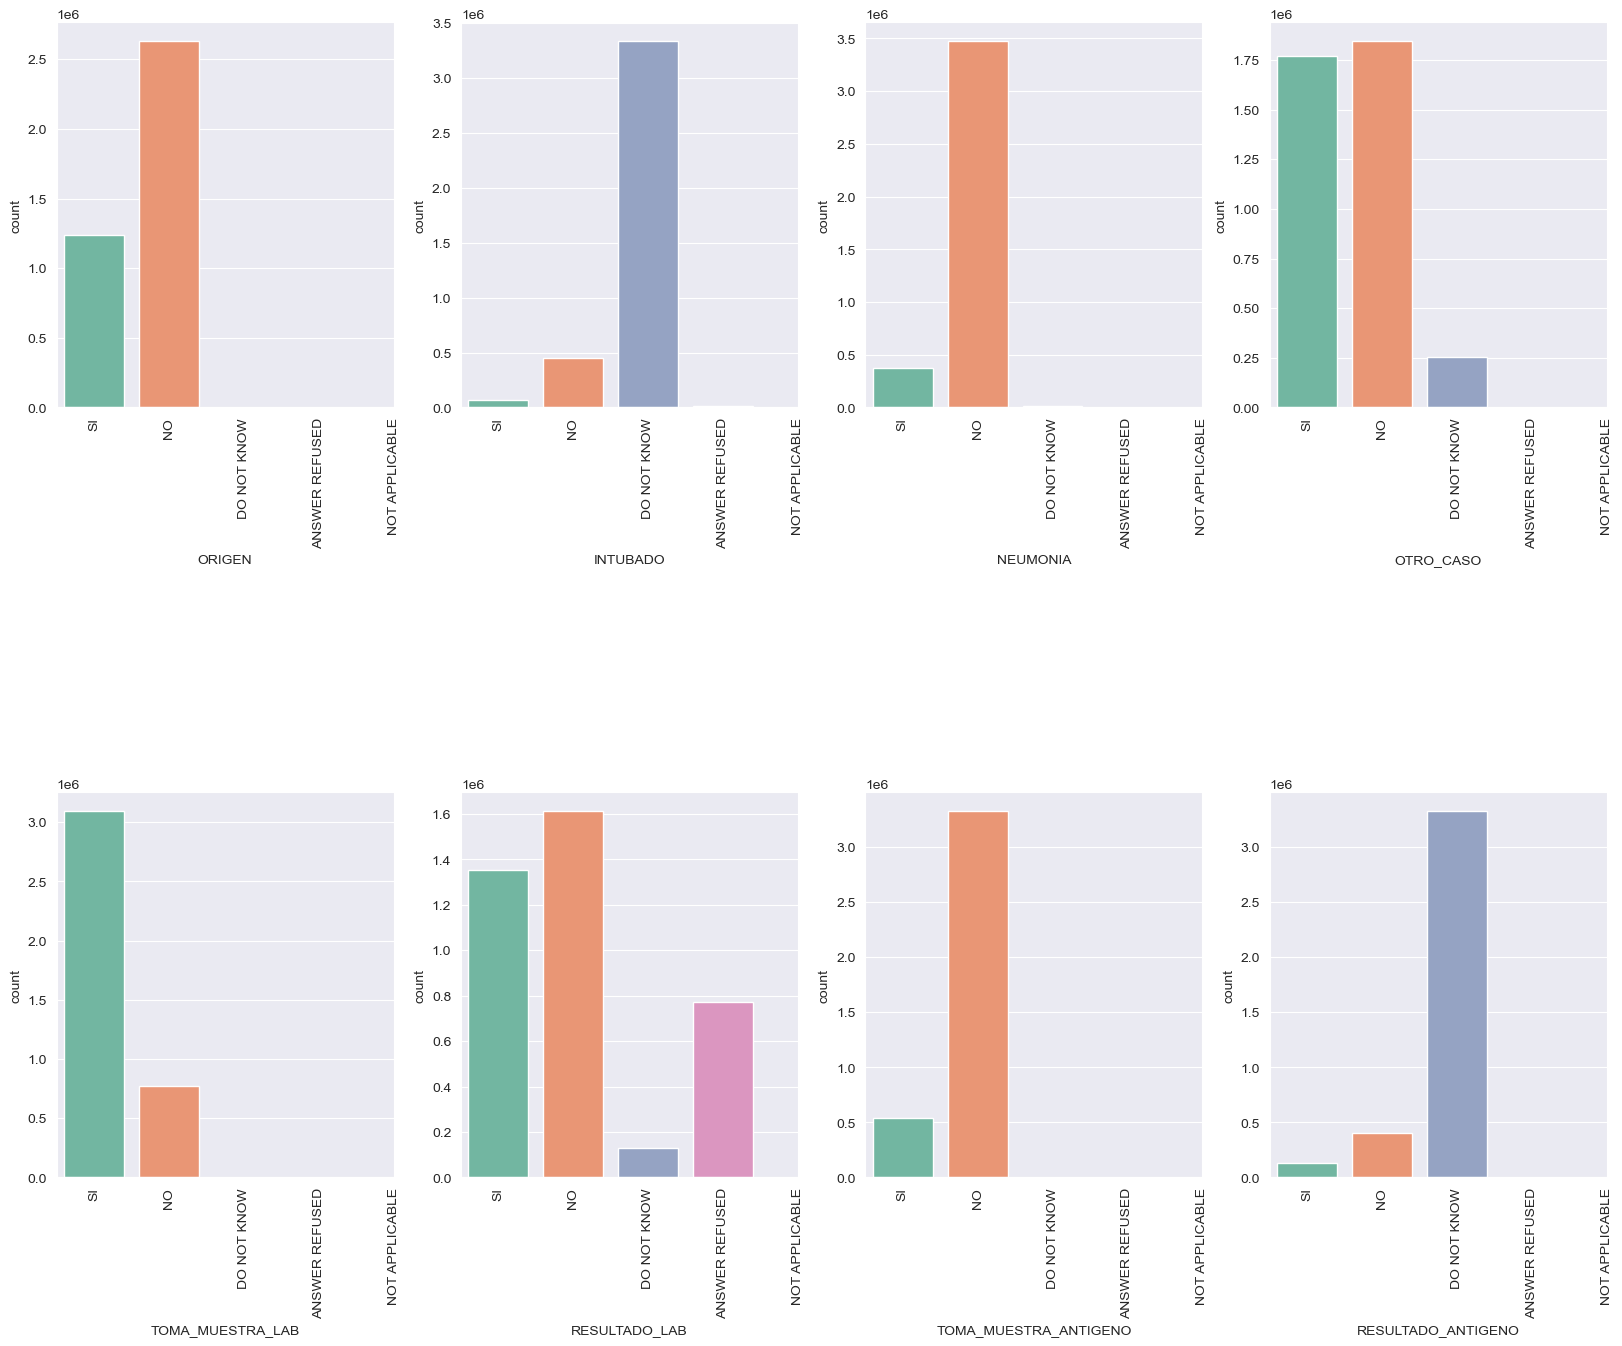

In [237]:
fig, ax = plt.subplots(2, 4, figsize=(20, 15))
fig.subplots_adjust(hspace=1)
for variable, subplot in zip(medical_info[1:9], ax.flatten()):
    chart = sns.countplot(x=df[variable], ax=subplot)
    chart.set_xticks(range(len(name_dict)), list(name_dict.keys()))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Covid19'), Text(1, 0, 'Healthy')]

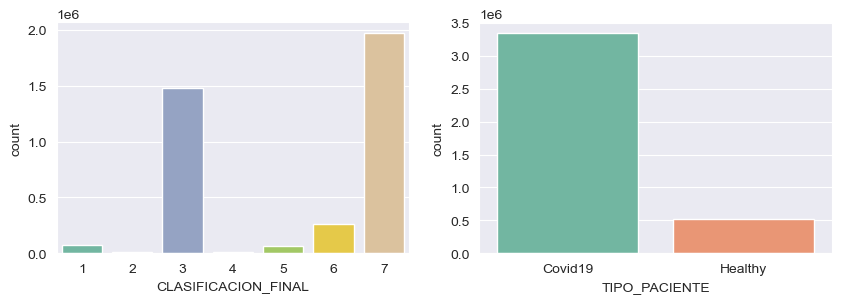

In [275]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(x=df['CLASIFICACION_FINAL'], ax=ax1)

c2 = sns.countplot(x=df['TIPO_PACIENTE'], ax=ax2)
c2.set_xticklabels(['Covid19', 'Healthy'])

In [293]:
# death is set to 9999-99-99 if patient is not dead
df[medical_info['FECHA_DEF']].value_counts()

9999-99-99    3657126
2021-01-04       1211
2020-12-29       1210
2021-01-03       1198
2020-12-28       1194
               ...   
2021-06-22          1
2021-07-09          1
2021-07-25          1
2021-07-15          1
2021-04-28          1
Name: FECHA_DEF, Length: 519, dtype: int64

In [298]:
# convert to date
for f in medical_info[12:14]:
    df[f] =  pd.to_datetime(df[f])

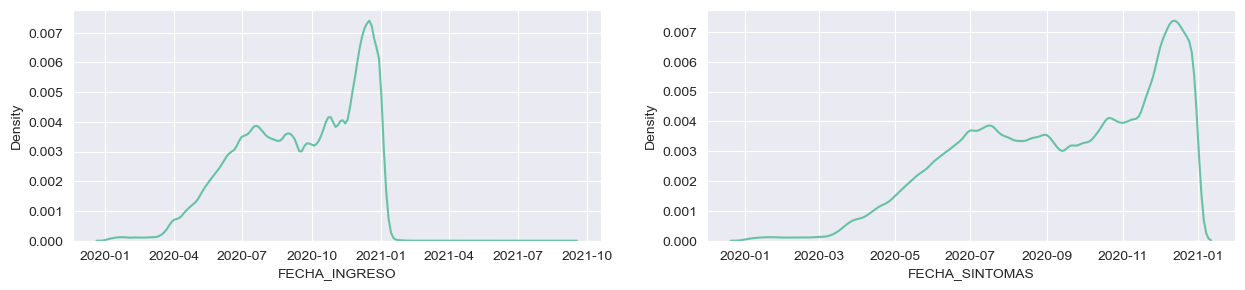

In [311]:
fig, ax = plt.subplots(1,2, figsize=(15, 3))
for variable, subplot in zip(medical_info[12:14], ax.flatten()):
    chart = sns.kdeplot(x=df[variable], ax=subplot)

**2.3 - Data Exploration:**

In [312]:
# days between syntoms and death
# days between syntoms and hospitalization 
# age of death
# death between man and women
# correlation  between features and target

**2.4 - Data Quality:**

In [313]:
# modify values nan in NAN
# outliers in Age for example